In [1]:
import pandas as pd
import numpy as np
import random
df = pd.read_csv("snacks.csv")

In [2]:
upBound = 4
downBound = 1
maximumWeight = 10
minimumValue = 16
population = []
numberOfSolutions = 1000
numberOfGenerations = 300
mutationProbabality = 0.3

In [3]:
class KnapsackItem:
    def __init__(self, key_, weight_, value_):
        self.key = key_
        self.value = value_
        self.weight = weight_

In [4]:
def getSolutionPoint(solution_):
    weightSum = 0
    valueSum = 0
    for item in solution_:
        weightSum += item.weight
        valueSum += item.value
    weightDifference = maximumWeight - weightSum
    valueDiffernce = valueSum - minimumValue
    if weightDifference * valueDiffernce > 0:
        return weightDifference + valueDiffernce
    else:
        if weightDifference > 0:
            return valueDiffernce
        else:
            return weightDifference

    

In [5]:


def weighted_choice(items):
    weights = [1 / (i + 1) for i in range(len(items))]
    return random.choices(items, weights=weights, k=2)



In [6]:
def crossOver(solution1, solution2):
    crossOverPoint = random.randint(1, len(solution1) - 1)
    solution_ = solution1[0:crossOverPoint] + solution2[crossOverPoint:]
    numberOfNonZeros = 0
    for item in solution_:
        if item.weight != 0:
            numberOfNonZeros += 1
    if numberOfNonZeros < downBound:
        for i in range(0, downBound - numberOfNonZeros):
            for item in solution_:
                if item.weight == 0:
                    item.weight = min(df.iloc[item.key, 1], abs(np.random.normal(df.iloc[item.key, 1] / 2, 1)))
                    item.value = (item.weight / df.iloc[item.key, 1]) * df.iloc[item.key, 2]
    elif numberOfNonZeros > upBound:
        diffrence = numberOfNonZeros - upBound
        while diffrence != 0:
            randomIndex = random.randint(0, len(df) - 1)
            if solution_[randomIndex].weight != 0:
                solution_[randomIndex].weight = 0
                solution_[randomIndex].value = 0
                diffrence -= 1                
    return solution_


In [7]:
def mutate(solution_):
    weightSum = 0
    for item in solution_:
        weightSum += item.weight
    if weightSum > maximumWeight and weightSum != 0:
        normalizationFactor = weightSum / maximumWeight
        for item in solution_:
            item.weight = item.weight / normalizationFactor
            item.value = item.value / normalizationFactor
    elif weightSum < maximumWeight and weightSum != 0:
        normalizationFactor = maximumWeight / weightSum
        for item in solution_:
            item.weight = item.weight * normalizationFactor
            item.value = item.value * normalizationFactor
    return solution_            



In [8]:
def mutate2(solution_):
    mutatedItemIndex = random.randint(0, len(df) - 1)
    mutatedItem = solution_[mutatedItemIndex]
    factor = random.choices([0.5, 2], [0.5, 0.5])
    mutatedItem.weight *= factor[0]
    mutatedItem.value *= factor[0]
    solution_[mutatedItemIndex] = mutatedItem
    return solution_

In [9]:
def findSolution():
    for j in range(0, 1000):
        weightSum = 0
        valueSum = 0
        for item in population[j]:
            weightSum += item.weight
            valueSum += item.value
        if weightSum <= maximumWeight and valueSum >= minimumValue:
            return [population[j], True]
    return [0, False]              

In [10]:

for i in range(0, numberOfSolutions):
    numberOfItems = random.randint(downBound, upBound)
    itemsKey = sorted(random.sample(np.arange(len(df)).tolist(), numberOfItems))
    solution = []
    for j in range(0, len(df)):
        if j in itemsKey:
            randomWeight = min(df.iloc[j, 1], abs(np.random.normal(df.iloc[j, 1] / 2, 1)))
            value = (randomWeight / df.iloc[j, 1])*df.iloc[j, 2]
            solution.append(KnapsackItem(j, randomWeight, value))
        else:
            solution.append(KnapsackItem(j, 0, 0))   
    population.append(solution)
population = sorted(population, key = lambda x : getSolutionPoint(x), reverse=True)

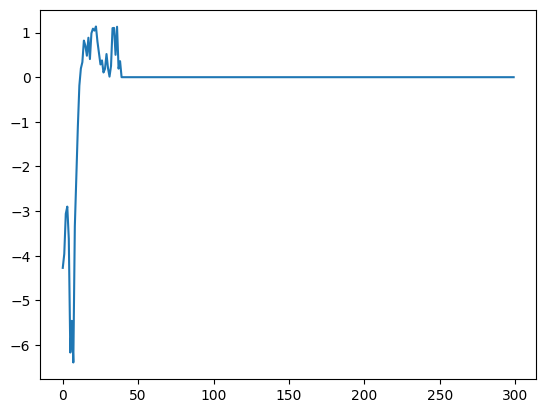

In [11]:
import matplotlib.pyplot as plt
averageValues = []
for i in range(0, numberOfGenerations):
    newPopulation = []
    for j in range(0, numberOfSolutions):
        parent1, parent2 = weighted_choice(population)
        newChild = crossOver(parent1, parent2)
        flag = random.choices([1, 2], weights=[abs(mutationProbabality), 1-abs(mutationProbabality)])
        if flag[0] == 1:
            newChild = mutate(newChild)
        newPopulation.append(newChild)
    population = newPopulation
    if i % 50 == 0:
        mutationProbabality = max(mutationProbabality - 0.1, 0)
    sorted(population, key = lambda x : getSolutionPoint(x), reverse=True)
    averageValues.append(sum(getSolutionPoint(sol) for sol in population) / len(population))    
plt.plot(averageValues)

In [12]:
finalAnswer = findSolution()
if finalAnswer[1]:
    for item in finalAnswer[0]:
        if item.weight != 0:
            print(df.iloc[item.key, 0], item.weight, item.value)

MazMaz 2.1796330432193685 2.1796330432193685
Nani 1.4346813219107548 1.4346813219107548
Jooj 6.385685634869877 13.683612074721196


In [13]:
for item in population[0]:
    if item.weight != 0:
        print(df.iloc[item.key, 0], item.weight, item.value)

MazMaz 2.1796330432193685 2.1796330432193685
Nani 1.4346813219107548 1.4346813219107548
Jooj 6.385685634869877 13.683612074721196
